In [47]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


In [8]:
train_path='/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train'

In [9]:
os.listdir(train_path)

['not fractured', 'fractured']

In [10]:
X=[]
y=[]
categories=['fractured','not fractured']
for i in categories:
  subdir=os.path.join(train_path,i)
  images=os.listdir(subdir)
  for j in images:
    image=os.path.join(subdir,j)
    img_arr=imread(image)
    img_resized=resize(img_arr,(224,224,1))
    X.append(img_resized)
    y.append(categories.index(i))
  print(f"{i} done")

fractured done
not fractured done


In [11]:
len(X),len(y)

(8863, 8863)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
len(X_train),len(y_train)

(7090, 7090)

In [14]:
len(X_test),len(y_test)

(1773, 1773)

In [15]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


In [16]:
X_train.shape

(7090, 224, 224, 1)

In [17]:
X_test.shape

(1773, 224, 224, 1)

In [18]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(224,224,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,'sigmoid'))


In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
early_stopping=EarlyStopping('loss',patience=5,restore_best_weights=True)

In [21]:


model.fit(X_train,y_train,epochs=30,batch_size=25,callbacks=[early_stopping])

Epoch 1/30
  3/284 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.4044 - loss: 0.9070

I0000 00:00:1721059377.261634      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721059377.282792      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


284/284 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.6807 - loss: 0.5872
Epoch 2/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9531 - loss: 0.1335
Epoch 3/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9897 - loss: 0.0325
Epoch 4/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9971 - loss: 0.0101
Epoch 5/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9949 - loss: 0.0149
Epoch 6/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9965 - loss: 0.0105
Epoch 7/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9940 - loss: 0.0163
Epoch 8/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 1.0000 - loss: 4.6149e-04
Epoch 9/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 1.0000 - loss: 3.4380e-05
Epoch 10/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 1.0000 - loss: 1.7512e-05
Epoch 11/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 1.0000 - loss: 1.2414e-05
Epoch 12/30
284/284 ━━━━━━━━━━━━━━━

In [22]:
model.evaluate(X_test,y_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9791 - loss: 0.1781


[0.13322904706001282, 0.9842075705528259]

In [23]:
model.save('my_model.h5')

In [24]:
def predict(image):
    img_arr=imread(image)
    img_resized=resize(img_arr,(224,224,1))
    new_img=img_resized.reshape(1,224,224,1)
    img_final=np.array(new_img)
    prediction=model.predict(img_final,verbose=0)
    if int(prediction.item())==1:
        print('NOT FRACTURED')
    else:
        print('FRACTURED')

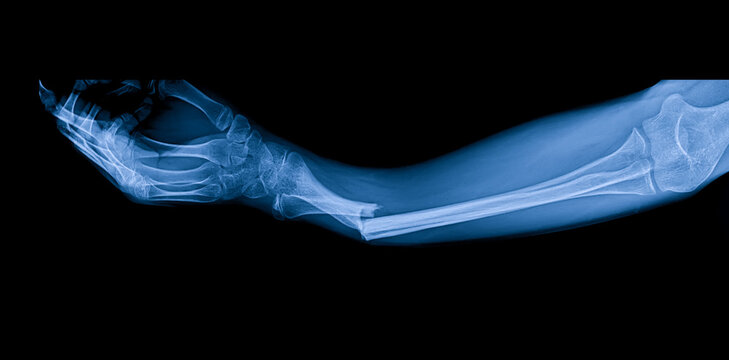

In [29]:
from PIL import Image
image='/kaggle/input/test-file/test1.jpg'
im=Image.open(image)
im

In [30]:
predict(image)

FRACTURED
